<a href="https://colab.research.google.com/github/Koperniko1/Spotify2023/blob/main/Spotify_top_2023.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **🎶 Análisis de las Tendencias Musicales en el Streaming Global**

## Introducción

La industria musical ha cambiado drásticamente en la era digital, y el streaming se ha convertido en el principal indicador del éxito de una canción. Plataformas como Spotify, Apple Music y Deezer dominan el consumo musical, y comprender qué factores influyen en la popularidad de una canción es clave para artistas, productores y la industria en general.

📊 ¿Qué hace que una canción sea un éxito? ¿Depende solo del número de playlists en las que aparece? ¿Las canciones más alegres son más populares? ¿Las colaboraciones entre artistas aumentan los streams?

Este estudio analiza un conjunto de más de 950 canciones populares en plataformas de streaming para descubrir patrones, tendencias y relaciones clave entre diferentes características musicales y su impacto en la cantidad de reproducciones.

🔍 Objetivos del análisis:
✅ Identificar qué factores están más correlacionados con el éxito de una canción en términos de streams.
✅ Examinar cómo el tono musical (modo mayor o menor) y la energía de una canción afectan su rendimiento.
✅ Evaluar el impacto de las colaboraciones entre artistas en la cantidad de reproducciones.
✅ Comparar el éxito de las canciones recientes con los clásicos que siguen dominando las listas.

🎵 Metodología
Para este análisis, se utilizaron datos de diversas plataformas de streaming, combinando métricas de popularidad con atributos musicales como bpm, danceability, valencia emocional y speechiness.

🚀 Conclusión esperada:
Este estudio busca responder qué elementos tienen un impacto real en el éxito de una canción y desmitificar algunas creencias sobre la música popular en la era del streaming.

💡 ¿Es el éxito cuestión de estrategia o simplemente magia musical? Vamos a descubrirlo. 🎧✨

## Fuente de Datos

El dataset utilizado en este análisis proviene de Kaggle y se puede encontrar en el siguiente enlace:

[Top Spotify Songs 2023](https://www.kaggle.com/datasets/nelgiriyewithana/top-spotify-songs-2023)


## **Importar librerias**

In [ ]:
import pandas as pd
from google.colab import drive
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import numpy as np

## **Cargar datos**

In [ ]:
# Montar Google Drive
drive.mount('/content/drive')

# Ruta completa al archivo en Google Drive
file_path = '/content/drive/My Drive/spotify_project/spotify-2023.csv'

# Leer el archivo CSV con una codificación diferente
df = pd.read_csv(file_path, encoding='latin1')

# Mostrar la información del dataset
df.info()


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 953 entries, 0 to 952
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   track_name            953 non-null    object
 1   artist(s)_name        953 non-null    object
 2   artist_count          953 non-null    int64 
 3   released_year         953 non-null    int64 
 4   released_month        953 non-null    int64 
 5   released_day          953 non-null    int64 
 6   in_spotify_playlists  953 non-null    int64 
 7   in_spotify_charts     953 non-null    int64 
 8   streams               953 non-null    object
 9   in_apple_playlists    953 non-null    int64 
 10  in_apple_charts       953 non-null    int64 
 11  in_deezer_playlists   953 non-null    object
 12  in_deezer_charts      953 non-null    int64 
 13  in_shazam_c

## Limpieza del dataset

**Formateo y unificación de fecha de lanzamiento**

In [ ]:
# Convertir a string y unir con "-"
df["released_date"] = df["released_day"].astype(str) + "-" + df["released_month"].astype(str) + "-" + df["released_year"].astype(str)

# Convertir la columna a tipo datetime
df["released_date"] = pd.to_datetime(df["released_date"], format="%d-%m-%Y")

# Eliminar las columnas ya consolidadas
df.drop(columns=["released_day", "released_month"], inplace=True)

# Verificar que se eliminaron correctamente y que el tipo es datetime
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 953 entries, 0 to 952
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   track_name            953 non-null    object        
 1   artist(s)_name        953 non-null    object        
 2   artist_count          953 non-null    int64         
 3   released_year         953 non-null    int64         
 4   in_spotify_playlists  953 non-null    int64         
 5   in_spotify_charts     953 non-null    int64         
 6   streams               953 non-null    object        
 7   in_apple_playlists    953 non-null    int64         
 8   in_apple_charts       953 non-null    int64         
 9   in_deezer_playlists   953 non-null    object        
 10  in_deezer_charts      953 non-null    int64         
 11  in_shazam_charts      903 non-null    object        
 12  bpm                   953 non-null    int64         
 13  key                 

**Normalización de la columna 'streams'**

In [ ]:
# Convertir "streams" a numérico, forzando errores a NaN
df["streams"] = pd.to_numeric(df["streams"], errors="coerce")

# Eliminar filas donde "streams" sea NaN
df = df.dropna(subset=["streams"])

# Convertir la columna "streams" a entero después de eliminar los NaN
df["streams"] = df["streams"].astype(int)

# Verificar cambios
print(df.info())  # Debería mostrar "streams" como int64


<class 'pandas.core.frame.DataFrame'>
Index: 952 entries, 0 to 952
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   track_name            952 non-null    object        
 1   artist(s)_name        952 non-null    object        
 2   artist_count          952 non-null    int64         
 3   released_year         952 non-null    int64         
 4   in_spotify_playlists  952 non-null    int64         
 5   in_spotify_charts     952 non-null    int64         
 6   streams               952 non-null    int64         
 7   in_apple_playlists    952 non-null    int64         
 8   in_apple_charts       952 non-null    int64         
 9   in_deezer_playlists   952 non-null    object        
 10  in_deezer_charts      952 non-null    int64         
 11  in_shazam_charts      902 non-null    object        
 12  bpm                   952 non-null    int64         
 13  key                   857

**Eliminación de comas y conversión a entero en 'in_deezer_playlists'**

In [ ]:
# Eliminar comas y convertir la columna a entero
df["in_deezer_playlists"] = df["in_deezer_playlists"].str.replace(",", "").astype(int)

# Verificar cambios
print(df["in_deezer_playlists"].dtype)  # Debería mostrar int
print(df["in_deezer_playlists"].head())  # Para revisar los primeros valores


int64
0     45
1     58
2     91
3    125
4     87
Name: in_deezer_playlists, dtype: int64


In [ ]:
# Eliminar comas y convertir a float (para manejar NaN correctamente)
df["in_shazam_charts"] = df["in_shazam_charts"].str.replace(",", "").astype(float)

# Verificar el cambio
print(df["in_shazam_charts"].dtype)  # Debería ser float
print(df["in_shazam_charts"].isna().sum())  # Contar cuántos NaN hay
print(df["in_shazam_charts"].describe())  # Ver estadísticos básicos


float64
50
count     902.000000
mean       60.062084
std       161.238101
min         0.000000
25%         0.000000
50%         2.500000
75%        37.000000
max      1451.000000
Name: in_shazam_charts, dtype: float64


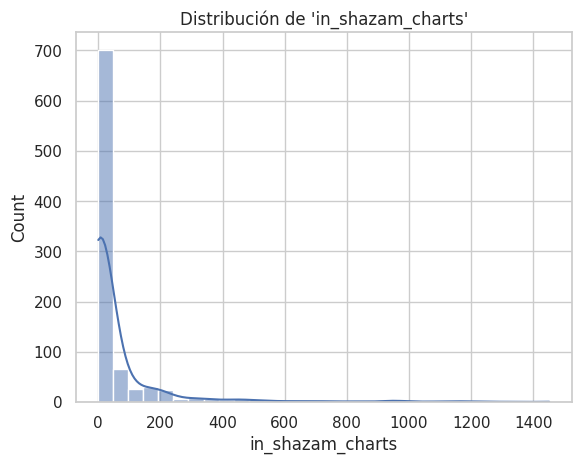

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Gráfico de distribución
sns.histplot(df["in_shazam_charts"], bins=30, kde=True)
plt.title("Distribución de 'in_shazam_charts'")
plt.show()


In [ ]:
# Imputar valores NaN con la mediana
df["in_shazam_charts"] = df["in_shazam_charts"].fillna(df["in_shazam_charts"].median()).astype(int)


# Verificar que ya no hay valores NaN y que la columna es int
print(df["in_shazam_charts"].isna().sum())  # Debería ser 0
df.info()

0
<class 'pandas.core.frame.DataFrame'>
Index: 952 entries, 0 to 952
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   track_name            952 non-null    object        
 1   artist(s)_name        952 non-null    object        
 2   artist_count          952 non-null    int64         
 3   released_year         952 non-null    int64         
 4   in_spotify_playlists  952 non-null    int64         
 5   in_spotify_charts     952 non-null    int64         
 6   streams               952 non-null    int64         
 7   in_apple_playlists    952 non-null    int64         
 8   in_apple_charts       952 non-null    int64         
 9   in_deezer_playlists   952 non-null    int64         
 10  in_deezer_charts      952 non-null    int64         
 11  in_shazam_charts      952 non-null    int64         
 12  bpm                   952 non-null    int64         
 13  key                   8

In [ ]:
# Filtrar canciones con menos de 1 millón de streams
canciones_bajo_un_millon = df[df['streams'] < 1e6]

# Ver las canciones que cumplen con esta condición
print(canciones_bajo_un_millon[['track_name', 'artist(s)_name', 'streams']])


      track_name              artist(s)_name  streams
123  Que Vuelvas  Carin Leon, Grupo Frontera     2762


In [ ]:
# Eliminar la fila con la canción que tiene menos de un millón de streams
df = df[df['streams'] >= 1e6]

# Verificar que la fila haya sido eliminada
print(df.info())


<class 'pandas.core.frame.DataFrame'>
Index: 951 entries, 0 to 952
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   track_name            951 non-null    object        
 1   artist(s)_name        951 non-null    object        
 2   artist_count          951 non-null    int64         
 3   released_year         951 non-null    int64         
 4   in_spotify_playlists  951 non-null    int64         
 5   in_spotify_charts     951 non-null    int64         
 6   streams               951 non-null    int64         
 7   in_apple_playlists    951 non-null    int64         
 8   in_apple_charts       951 non-null    int64         
 9   in_deezer_playlists   951 non-null    int64         
 10  in_deezer_charts      951 non-null    int64         
 11  in_shazam_charts      951 non-null    int64         
 12  bpm                   951 non-null    int64         
 13  key                   856

## **Analisis exploratorio**

### **Descifrando Relaciones: Heatmap de Correlación**

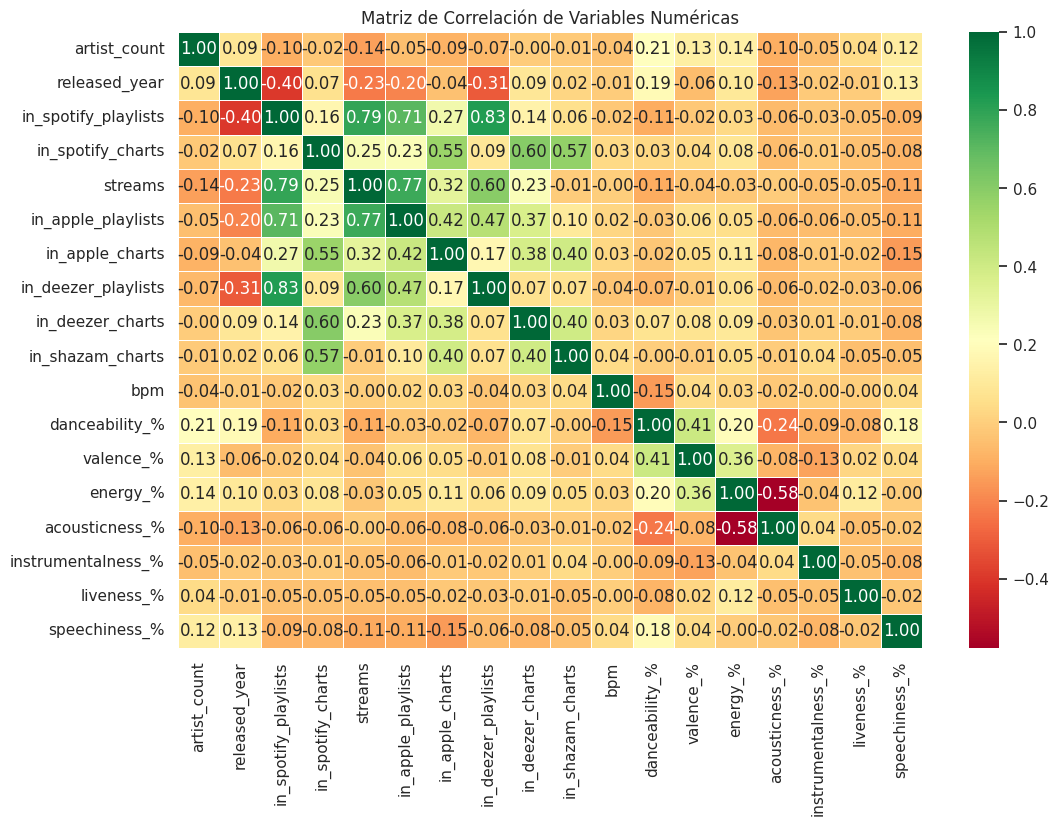

In [ ]:
# Crear la matriz de correlación
correlation_matrix = df.select_dtypes(include=["int64"]).corr()

# Configurar el tamaño del gráfico
plt.figure(figsize=(12, 8))

# Crear el heatmap con Seaborn
sns.heatmap(correlation_matrix, annot=True, cmap="RdYlGn", fmt=".2f", linewidths=0.5)

# Agregar título
plt.title("Matriz de Correlación de Variables Numéricas")

# Mostrar la gráfica
plt.show()


**🔝 Más playlists = más streams**  

🎧 **Spotify** (correlación: **0.79**) y **Apple Music** (**0.77**) muestran que cuantas más playlists incluyen una canción, más reproducciones obtiene. No hay sorpresa aquí: más exposición, más plays. 🚀  

**🎯 Las plataformas van de la mano**  

Si una canción está en muchas **playlists de Spotify**, también suele estar en **Deezer** (**0.83**). Parece que los curadores de playlists siguen tendencias similares. 🔄  

**🌍 Los hits son universales**  

Si una canción entra en los **charts de Spotify**, hay una buena probabilidad de que también lo haga en **Apple Music** (**0.55**). Los éxitos no tienen fronteras. 🚀🎶  

**⚡ Energía vs. Acústica: una batalla real**  

Canciones con **alta energía** suelen tener **baja acústica** (**-0.57**). Totalmente lógico: un temazo enérgico es más electrónico 🔊, mientras que lo acústico es más chill. 🎸  

**💃 ¿Feliz y bailable? Sí, por favor**  

Canciones con más **danceability** tienden a ser más **felices** (**0.41**). No es casualidad que los himnos de la fiesta sean positivos. 🎉  

**⏳ No todo es BPM**  

**BPM y danceability** no están tan relacionados (**-0.14**). Una canción rápida no es necesariamente más bailable. Depende más del groove. 🕺  

**🎤 Mucho speech = menos charts en Apple**  

Canciones con más partes habladas (**speechiness_%**) tienen menor probabilidad de estar en los **charts de Apple Music** (**-0.15**). Quizá porque lo comercial sigue apostando más por melodías pegajosas. 🤷‍♂️  


### **Análisis de Distribución de Notas y Modos Musicales**

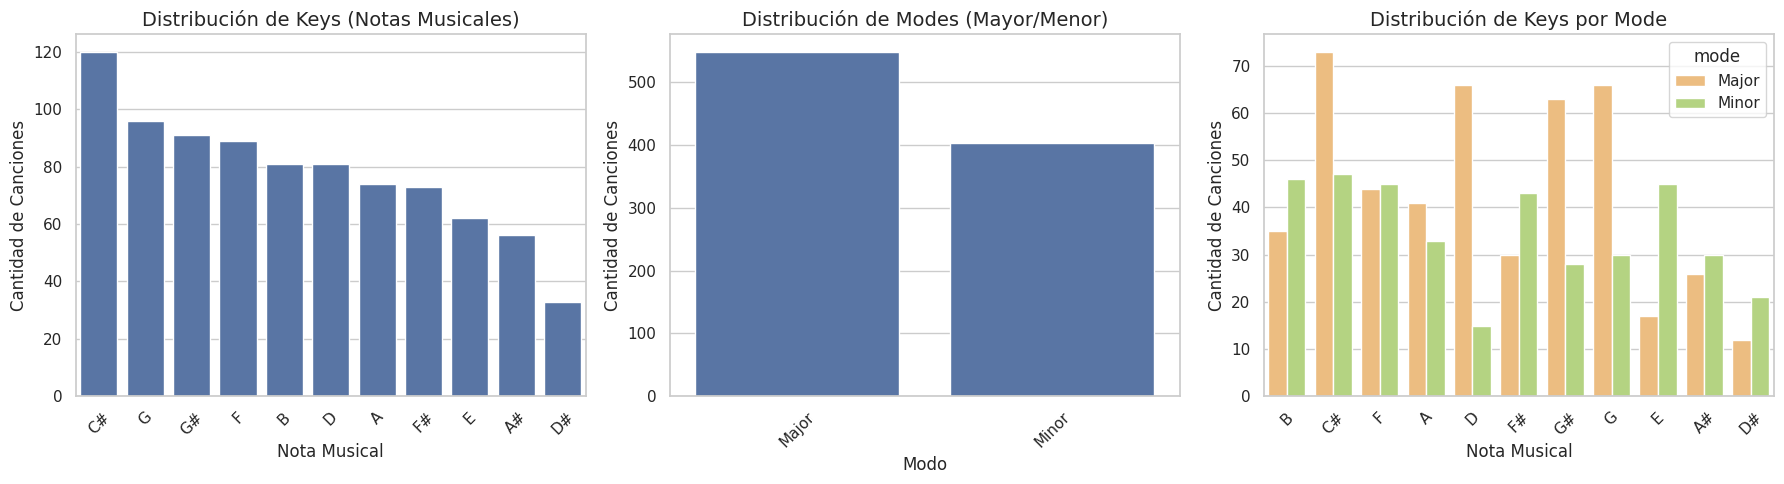

In [ ]:
# Configuración del estilo de Seaborn
sns.set_theme(style="whitegrid")

# Crear figura y ejes
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Gráfico 1: Distribución de keys (Notas Musicales)
sns.countplot(x="key", data=df, order=df["key"].value_counts().index, ax=axes[0])
axes[0].set_title("Distribución de Keys (Notas Musicales)", fontsize=14)
axes[0].set_xlabel("Nota Musical", fontsize=12)
axes[0].set_ylabel("Cantidad de Canciones", fontsize=12)

# Gráfico 2: Distribución de modes (Mayor/Menor)
sns.countplot(x="mode", data=df, order=df["mode"].value_counts().index, ax=axes[1])
axes[1].set_title("Distribución de Modes (Mayor/Menor)", fontsize=14)
axes[1].set_xlabel("Modo", fontsize=12)
axes[1].set_ylabel("Cantidad de Canciones", fontsize=12)

# Gráfico 3: Comparación key vs. mode
sns.countplot(x="key", hue="mode", data=df, palette="RdYlGn", ax=axes[2])
axes[2].set_title("Distribución de Keys por Mode", fontsize=14)
axes[2].set_xlabel("Nota Musical", fontsize=12)
axes[2].set_ylabel("Cantidad de Canciones", fontsize=12)

# Rotar etiquetas del eje x correctamente
for ax in axes:
    ax.set_xticks(ax.get_xticks())  # Asegurar que hay ticks definidos
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

# Ajustar diseño
plt.tight_layout()
plt.show()


**🔑 ¿Cuáles son las notas musicales más usadas en las canciones populares?**  
🎵 La nota más común es **C# (Do sostenido)** con 120 canciones.  
🎵 Le siguen **G (Sol) con 96** y **G# (Sol sostenido) con 91**.  
🎵 La nota menos frecuente es **D# (Re sostenido) con solo 33 canciones**.  

Parece que los tonos más brillantes y versátiles dominan las listas. 🔥  

---

**🎼 ¿Las canciones son más mayores o menores?**  
✅ **549 canciones están en modo mayor**, lo que indica que la mayoría de la música popular tiende a sonar más brillante y optimista.  
✅ **403 canciones están en modo menor**, lo que también es una cantidad considerable, mostrando que los tonos melancólicos y oscuros siguen teniendo presencia.  

🔎 **Conclusión:** Aunque el modo mayor domina, la música triste y emocional sigue siendo fuerte en las listas. 😢💙  

---

**📊 ¿Cómo se distribuyen las notas entre los modos mayor y menor?**  
🎶 **El C# mayor es el más común** con 73 canciones, seguido por G# mayor con 63.  
🎶 **El D menor es el menos usado**, con solo 15 canciones.  
🎶 Algunos tonos están casi equilibrados, como **F mayor (44) vs. F menor (45)**.  

🔎 **Conclusión:** Algunos tonos son más versátiles en ambos modos, mientras que otros, como **D# y E, se inclinan más al modo menor**.  

📌 **Dato curioso:** La predominancia de C# podría indicar que los productores prefieren ese tono por su versatilidad en la producción musical moderna. 🎛️🎚️  

### **¿Las canciones más populares son recientes o hay clásicos en la lista?**

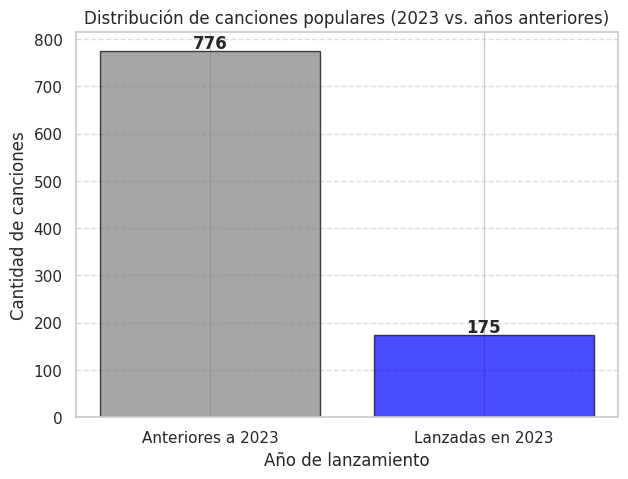

In [ ]:
# Crear las categorías
df['is_2023'] = df['released_year'] == 2023  # True si es de 2023, False si es anterior

# Contar cuántas canciones hay en cada categoría
counts = df['is_2023'].value_counts().sort_index()  # Ordenar para que primero salga "No" y luego "Sí"
labels = ['Anteriores a 2023', 'Lanzadas en 2023']  # Etiquetas para el gráfico

# Graficar
plt.figure(figsize=(7, 5))
plt.bar(labels, counts, color=['gray', 'blue'], alpha=0.7, edgecolor='black')
plt.xlabel('Año de lanzamiento')
plt.ylabel('Cantidad de canciones')
plt.title('Distribución de canciones populares (2023 vs. años anteriores)')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Mostrar valores sobre las barras
for i, count in enumerate(counts):
    plt.text(i, count + 5, str(count), ha='center', fontsize=12, fontweight='bold')

plt.show()


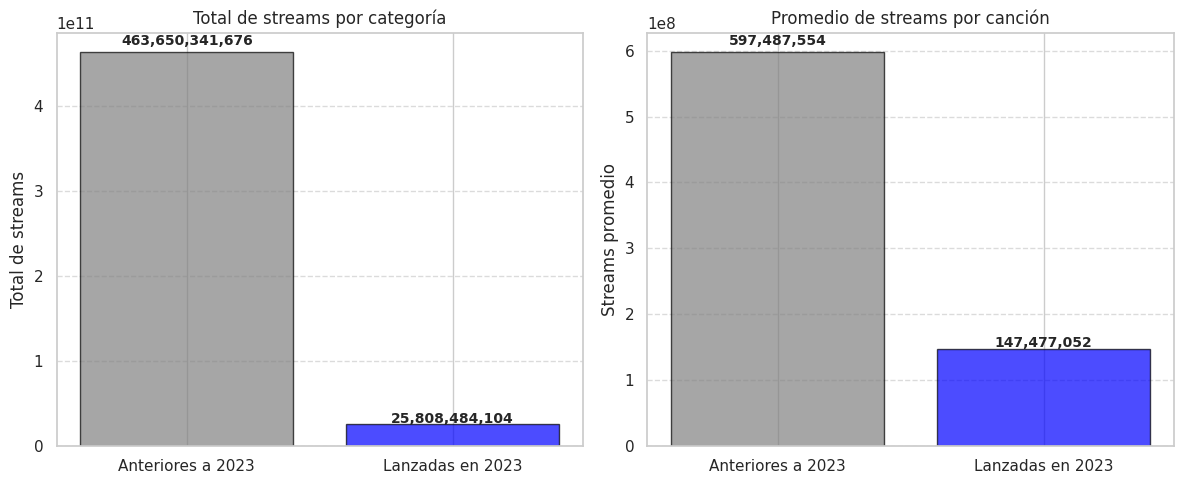

In [ ]:
# Calcular el total de streams por categoría
streams_totales = df.groupby('is_2023')['streams'].sum()

# Calcular el promedio de streams por canción en cada categoría
streams_promedio = df.groupby('is_2023')['streams'].mean()

# Definir etiquetas
labels = ['Anteriores a 2023', 'Lanzadas en 2023']

# Crear la figura y los subgráficos
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Gráfico 1: Total de streams
axes[0].bar(labels, streams_totales, color=['gray', 'blue'], alpha=0.7, edgecolor='black')
axes[0].set_title('Total de streams por categoría')
axes[0].set_ylabel('Total de streams')
axes[0].grid(axis='y', linestyle='--', alpha=0.7)

# Mostrar valores en las barras
for i, count in enumerate(streams_totales):
    axes[0].text(i, count * 1.02, f"{count:,}", ha='center', fontsize=10, fontweight='bold')

# Gráfico 2: Promedio de streams por canción
axes[1].bar(labels, streams_promedio, color=['gray', 'blue'], alpha=0.7, edgecolor='black')
axes[1].set_title('Promedio de streams por canción')
axes[1].set_ylabel('Streams promedio')
axes[1].grid(axis='y', linestyle='--', alpha=0.7)

# Mostrar valores en las barras
for i, count in enumerate(streams_promedio):
    axes[1].text(i, count * 1.02, f"{count:,.0f}", ha='center', fontsize=10, fontweight='bold')

# Ajustar diseño y mostrar
plt.tight_layout()
plt.show()


📅 **2023 vs. el pasado: ¿Quién domina los streams?**

🔵 Las canciones nuevas no son mayoría
De las 952 canciones en el dataset, solo 175 fueron lanzadas en 2023. Mientras tanto, 776 son de años anteriores. Parece que los clásicos siguen fuertes. 🔥

📊 **Streams totales: los hits antiguos mandan**

* Canciones de 2023: 25.8 mil millones de streams. 🎧
* Canciones anteriores: 463.6 mil millones de streams. 🔥

Los números hablan: los éxitos de años pasados siguen arrasando en reproducciones.

⚖️ **Streams promedio: lo viejo sigue pegando más**

* Una canción de 2023 promedia 147M de streams.
* Una canción de años anteriores promedia 597M de streams.

💡 Conclusión: Aunque hay música nueva en la lista, los verdaderos gigantes del streaming llevan años sonando. Para llegar a lo más alto, una canción necesita tiempo... o convertirse en un fenómeno viral inmediato. 🚀🎶

### Comparación de los Artistas Más Exitosos: Recientes vs. Consolidados

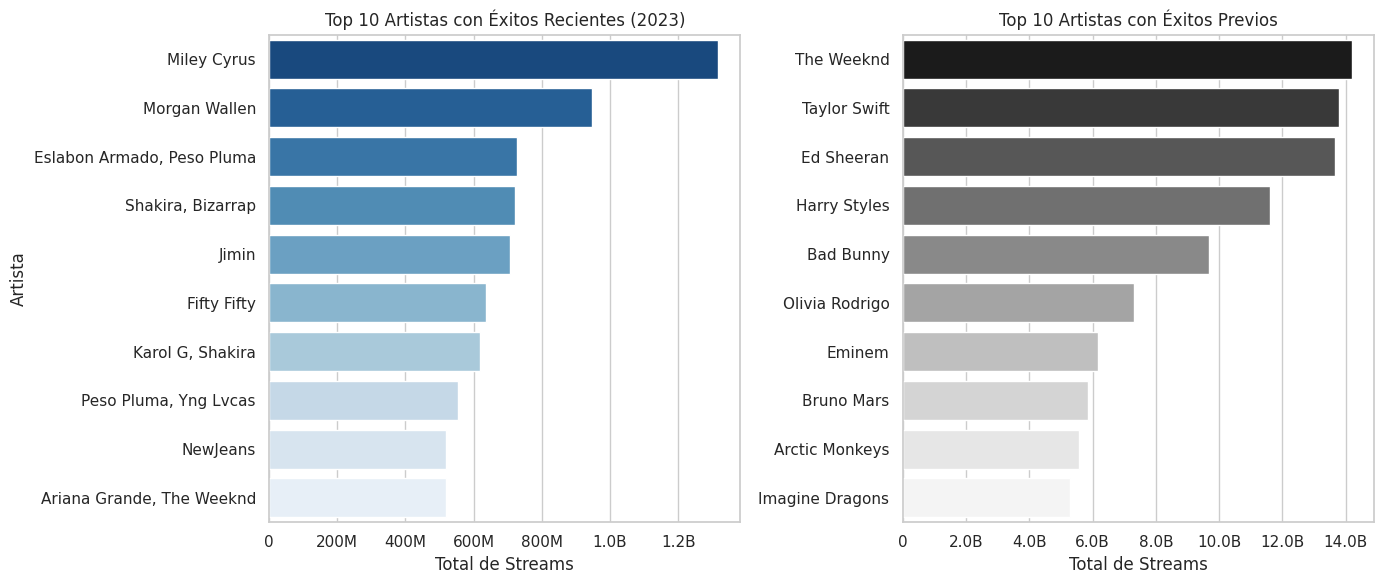

In [ ]:
# Renombrar las categorías
df['categoria_artista'] = df['is_2023'].map({True: 'Artistas con éxitos recientes',
                                             False: 'Artistas con éxitos previos'})

# Sumar streams por artista y categoría
streams_por_artista = df.groupby(['categoria_artista', 'artist(s)_name'])['streams'].sum().reset_index()

# Obtener el Top 10 de cada grupo
top_recientes = streams_por_artista[streams_por_artista['categoria_artista'] == 'Artistas con éxitos recientes']\
    .nlargest(10, 'streams')

top_previos = streams_por_artista[streams_por_artista['categoria_artista'] == 'Artistas con éxitos previos']\
    .nlargest(10, 'streams')

# Función para formatear los números en millones o billones
def format_streams(x, pos):
    if x >= 1e9:
        return f'{x/1e9:.1f}B'  # Billones con 1 decimal
    elif x >= 1e6:
        return f'{x/1e6:.0f}M'  # Millones sin decimales
    return str(int(x))  # Si es menor a 1M, mostrar número entero

# Configuración de estilo
sns.set_style("whitegrid")

# Crear la figura con dos subgráficos
fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharex=False)

# Gráfico 1: Artistas con éxitos recientes (2023)
sns.barplot(data=top_recientes,
            x='streams',
            y='artist(s)_name',
            ax=axes[0],
            hue='artist(s)_name',
            palette='Blues_r',
            legend=False)

axes[0].set_title("Top 10 Artistas con Éxitos Recientes (2023)")
axes[0].set_xlabel("Total de Streams")
axes[0].set_ylabel("Artista")
axes[0].xaxis.set_major_formatter(ticker.FuncFormatter(format_streams))  # Aplicar formato

# Gráfico 2: Artistas con éxitos previos (antes de 2023)
sns.barplot(data=top_previos,
            x='streams',
            y='artist(s)_name',
            ax=axes[1],
            hue='artist(s)_name',
            palette='Greys_r',
            legend=False)

axes[1].set_title("Top 10 Artistas con Éxitos Previos")
axes[1].set_xlabel("Total de Streams")
axes[1].set_ylabel("")
axes[1].xaxis.set_major_formatter(ticker.FuncFormatter(format_streams))  # Aplicar formato

# Ajustar el diseño y mostrar
plt.tight_layout()
plt.show()


🔥 **Éxitos recientes vs. éxitos previos: ¿Quién domina los streams?**

🎤 Los artistas con éxitos recientes (canciones 2023) aún están lejos del dominio de los clásicos.
Miley Cyrus lidera con 1.3B streams, pero sigue muy por detrás de los pesos pesados de la industria.

👑 **Los reyes del streaming siguen siendo los mismos.**
The Weeknd, Taylor Swift y Ed Sheeran encabezan la lista de artistas con éxitos previos, acumulando más de 13B streams cada uno.

📈 **Peso Pluma y Bizarrap lideran el sonido latino de 2023.**
El regional mexicano y la música urbana siguen rompiendo récords con artistas como Peso Pluma y Bizarrap, consolidándose en el top global.

🚀 **¿Ser un clásico asegura más streams?**
La diferencia es clara: los artistas con canciones previas a 2023 dominan en volumen total de streams.

### **Análisis de la relación entre la valencia emocional (feliz vs. triste) y la popularidad de las canciones**

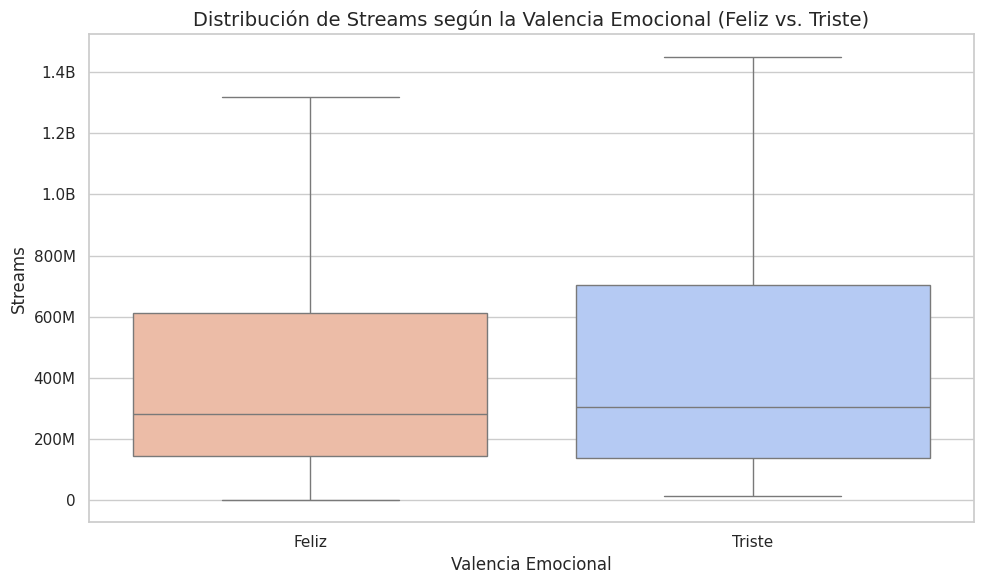

,count,mean,std,min,25%,50%,75%,max
valencia_emocional,,,,,,,,
Feliz,488.0,4.934228e+08,5.487922e+08,1365184.0,144579887.5,281548550.5,6.135230e+08,3.562544e+09
Triste,463.0,5.370810e+08,5.851576e+08,14780425.0,139514934.0,304079786.0,7.043857e+08,3.703895e+09


In [ ]:
# Crear una nueva columna para clasificar la valencia
df['valencia_emocional'] = df['valence_%'].apply(lambda x: 'Feliz' if x > 50 else 'Triste')

# Comparar la distribución de streams según la valencia emocional
# Comparar la distribución de streams según la valencia emocional
plt.figure(figsize=(10, 6))
sns.boxplot(data=df,
            x='valencia_emocional',
            y='streams',
            hue='valencia_emocional',  # Asignar el hue para evitar el FutureWarning
            palette='coolwarm_r',  # rojo feliz, azul triste
            showfliers=False)  # Si quieres ocultar los puntos atípicos

# Ajustar los formatos de los números en el eje y
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(format_streams))

# Títulos y etiquetas
plt.title('Distribución de Streams según la Valencia Emocional (Feliz vs. Triste)', fontsize=14)
plt.xlabel('Valencia Emocional', fontsize=12)
plt.ylabel('Streams', fontsize=12)

# Mostrar el gráfico
plt.tight_layout()
plt.show()

**🎶¿Influye la valencia emocional en el rendimiento de las canciones?**

Al analizar las distribuciones de streams de las canciones según su "valencia emocional" (feliz o triste), hemos encontrado que, en general, ambas categorías muestran un desempeño bastante similar en términos de popularidad.

💡 **Hallazgos clave:**
1. Promedios comparables: La media de streams para las canciones felices es de aproximadamente 493 millones, mientras que para las tristes es de alrededor de 537 millones. Aunque las canciones tristes parecen tener una ligera ventaja en promedio, la diferencia no es significativamente grande.

2. Distribución similar: Ambas categorías presentan una distribución bastante amplia en cuanto a los streams, con valores extremos que alcanzan hasta 3.5 mil millones de streams para las canciones tristes y 3.56 mil millones para las felices, lo que sugiere que tanto las canciones alegres como las melancólicas tienen potencial para generar grandes éxitos.

3. Poco efecto de la valencia emocional: El rendimiento de las canciones no parece depender excesivamente de si la canción es "feliz" o "triste". Las diferencias entre ambas categorías son sutiles, lo que indica que otros factores (como el artista, la promoción, la relevancia cultural, entre otros) juegan roles más determinantes en el éxito de las canciones.

### **Distribución de Streams Según el Número de Artistas en la Canción**

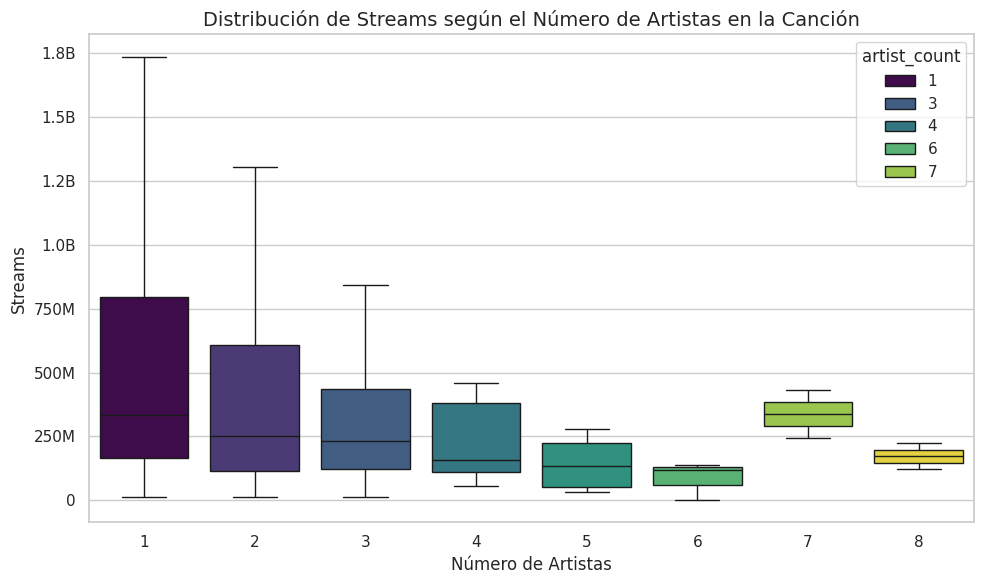

In [ ]:
# Agrupar las canciones según el número de artistas y observar la distribución de streams
plt.figure(figsize=(10, 6))

# Crear un boxplot para comparar la distribución de streams según el número de artistas
sns.boxplot(data=df,
            x='artist_count',  # Número de artistas
            y='streams',
            hue='artist_count',  # Asignar la variable 'artist_count' a hue
            palette='viridis',  # Paleta de colores
            showfliers=False)  # Omitir los puntos atípicos si es necesario

# Ajustar el formato de los números en el eje y
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(format_streams))

# Títulos y etiquetas
plt.title('Distribución de Streams según el Número de Artistas en la Canción', fontsize=14)
plt.xlabel('Número de Artistas', fontsize=12)
plt.ylabel('Streams', fontsize=12)

# Mostrar el gráfico
plt.tight_layout()
plt.show()

**🔑 ¿Cómo se distribuyen los streams según el número de artistas en las canciones?**

**🎶 Las canciones con un solo artista dominan las listas:**

586 canciones tienen un solo artista, con un promedio de 568 millones de streams.

El número máximo de streams alcanzado en esta categoría es de 3.7B, lo que indica que los artistas solistas siguen siendo los más exitosos en términos de popularidad.

**🎤 Las colaboraciones tienen un desempeño ligeramente inferior:**

Las canciones con dos artistas tienen un promedio de 464 millones de streams.
Con tres artistas, los streams promedio caen a 381 millones, y con cuatro artistas llegan a 306 millones.

🔎 Conclusión: Las canciones con un solo artista siguen siendo las más populares, mientras que las colaboraciones más grandes (de cinco o más artistas) tienden a registrar un menor promedio de streams.

**🎵 Canciones con más de tres artistas son menos frecuentes:**

Las canciones con cinco artistas tienen un promedio de solo 144 millones de streams.
Con seis artistas, el promedio disminuye a 87 millones.
Las colaboraciones con más de cuatro artistas son menos comunes, con solo 10 canciones en total que incluyen 5 o más artistas.

🔎 Conclusión: A pesar de que las colaboraciones masivas son menos frecuentes, siguen siendo una tendencia interesante, pero los solistas siguen siendo los más exitosos en términos de streams.

**📊 Resumen de la distribución de streams según el número de artistas:**

* 1 artista: 586 canciones, promedio de 568 millones de streams.
* 2 artistas: 253 canciones, promedio de 464 millones de streams.
* 3 artistas: 85 canciones, promedio de 381 millones de streams.
* 4 artistas: 15 canciones, promedio de 306 millones de streams.
* 5 o más artistas: 10 canciones, promedio de 144 millones de streams.

🔎 Dato curioso: Aunque las colaboraciones más grandes tienen un impacto menor en los streams promedio, las canciones con un solo artista continúan dominando el mercado musical.
___

## 🔑 **Insights Relevantes del Estudio Musical 2023**

*   Elemento de la lista
*   Elemento de la lista



1. **Más Playlists = Más Streams** 🚀  
   Spotify (0.79) y Apple Music (0.77) muestran que las canciones que aparecen en más playlists tienen más reproducciones. Esto es una clara indicación de que la exposición es uno de los factores más importantes para aumentar la popularidad de una canción.

2. **Las Plataformas Van de la Mano** 🔄  
   La correlación de 0.83 entre Spotify y Deezer indica que las canciones que triunfan en una plataforma tienden a hacerlo también en otras. Los curadores de playlists en diferentes plataformas siguen tendencias similares, creando un ecosistema de música compartida.

3. **Los Éxitos Universales** 🌍  
   Si una canción entra en los charts de Spotify, es probable que también lo haga en Apple Music (0.55). Los éxitos tienden a cruzar las barreras entre plataformas, lo que sugiere que la popularidad de una canción no tiene fronteras.

4. **El Modo Mayor Predomina** 🔆  
   La mayoría de las canciones están en modo mayor (549), lo que refuerza la idea de que la música popular tiende a ser brillante y optimista. Aunque el modo menor (403) sigue siendo importante, lo feliz y energético domina en las listas.

5. **No Hay una Relación Directa entre BPM y Danceability** 🕺  
   Aunque los BPM altos suelen asociarse con canciones rápidas, la danceability no está correlacionada de manera significativa con el BPM (-0.14). Esto demuestra que la sensación de ritmo o groove tiene más que ver con lo bailable de una canción que su velocidad.

6. **Las Canciones Solistas Dominan** 🎤  
   Las canciones con un solo artista son las más populares, con un promedio de 568 millones de streams. Las colaboraciones con más de 5 artistas tienen un rendimiento inferior, con un promedio de 144 millones de streams. Esto indica que, aunque las colaboraciones masivas son interesantes, los solistas siguen siendo los grandes ganadores en términos de streams.

7. **La Valencia Emocional No Afecta Drásticamente el Rendimiento** 💡  
   Aunque las canciones felices promedian 493 millones de streams y las tristes 537 millones, la diferencia es sutil. Esto sugiere que la valencia emocional no es un factor determinante en el rendimiento de las canciones. Otros aspectos, como el artista o la promoción, son más relevantes.

🔎 **Conclusiones Clave**

1. **La Exposición Es Clave Para el Éxito**  
   Las correlaciones fuertes entre las canciones que aparecen en múltiples playlists y sus streams (como en Spotify y Apple Music) nos dicen que, para alcanzar el éxito, las canciones deben estar muy expuestas. La visibilidad es uno de los factores determinantes para ganar popularidad en cualquier plataforma.

2. **Los Solistas Siguen Dominando el Mercado** 🎤  
   Aunque las colaboraciones son comunes, las canciones de un solo artista continúan siendo las más exitosas. Esto podría ser porque el enfoque en un solo artista permite una mayor conexión con los fans, mientras que las colaboraciones masivas pueden diluir esa conexión.

3. **La Música Energética y Alegre Predomina** 🎶  
   El modo mayor y las canciones más bailables están relacionadas con un mayor optimismo y energía. Esto respalda la tendencia actual de que las listas de éxitos están dominadas por canciones que buscan generar positividad y entusiasmo.

4. **El Éxito No Se Basa Solo en la Valencia Emocional**  
   A pesar de que las canciones felices y tristes tienen rendimientos similares, parece que el éxito de una canción está determinado más por factores como el artista, la promoción y el marketing que por su tono emocional. La versatilidad y la conexión emocional siguen siendo clave, pero no es el único factor a considerar.

5. **Las Colaboraciones Siguen Siendo una Tendencia Interesante, pero No Son la Clave del Éxito**  
   Aunque las canciones con más artistas parecen tener un rendimiento inferior en promedio, las colaboraciones con 2-3 artistas siguen siendo muy comunes. Las colaboraciones más grandes (5 o más artistas) tienen menos éxito, lo que sugiere que la simplicidad puede ser más eficaz.

📌 **Dato Curioso:**  
La predominancia de C# como la nota más usada en las canciones populares podría indicar que los productores están favoreciendo este tono por su versatilidad en la producción musical moderna. 🎛️🎚️

🔑 **Conclusión Final:**  
El éxito musical no depende de una sola fórmula. La exposición en playlists y plataformas, la energía de las canciones y la simplicidad de los artistas solistas son factores clave, mientras que la valencia emocional y la colaboración masiva no parecen ser tan determinantes. La música que conecta con el público sigue siendo optimista, enérgica y, sobre todo, expuesta a gran escala. 🚀🎶
